In [29]:
%%time

import pandas as pd
import numpy as np

# Random seed for reproducibility
SEED = 123
# A file to save global variables
global_variables = pd.DataFrame({'SEED': [SEED]})
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

train_unprocessed = pd.read_csv('datasets/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test_unprocessed = pd.read_csv('datasets/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')



train_unprocessed.head()

CPU times: total: 812 ms
Wall time: 1.22 s


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [30]:
train_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## 00. Baseline

First, we'll make a baseline prediction, that all emissions are equal to the median emission of the training set. We'll calculate the RMSE of this prediction on the training set (for future cases, we'll calculate separately Train RMSE and Cross-validation RMSE).

We'll save our intermediate results in DataFrame scores_df:

In [31]:
from sklearn.metrics import mean_squared_error

train_predictions_00 = pd.DataFrame([train_unprocessed['emission'].median()] * len(train_unprocessed), columns=['emission'])

scores_df = pd.DataFrame({'Comment': [], 'Train RMSE': [], 'Cross-val RMSE': [], 'Test RMSE': []})

score_00 = mean_squared_error(train_unprocessed['emission'], train_predictions_00['emission'], squared=False) - 0

scores_df.loc[0, 'Comment'] = 'Just median'
scores_df.loc[0, 'Train RMSE'] = score_00
scores_df.loc[0, 'Cross-val RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,NaN


Now, we'll make a submission to Kaggle to see our Test RMSE. We won't use Test RMSE in making decisions, since we don't want to overfit to the visible testing data (unvisible part of the testing data will be used in calculating the final competition score) but we'll use Test RMSE to catch bugs in our Score calculations:

In [32]:
test_predictions_00 = pd.DataFrame([train_predictions_00['emission'].median()] * len(test_unprocessed), columns=['emission'])
submission_00 = pd.concat([pd.DataFrame(test_unprocessed.index, columns=['ID_LAT_LON_YEAR_WEEK']), test_predictions_00], axis=1)

submission_00.to_csv('submissions/submission_00.csv', index=False)

scores_df.loc[0, 'Test RMSE'] = 169.19374
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374


## Choosing number of cross-validation splits

We'll use LightGBM as our first estimator. It is fast, efficient, doesn't require normalization and can handle missing values.

For calculating Score, I wrote get_score function, that is located in ['functions/get_score.py'](functions/get_score.py). This function uses TimeSeriesSplit for cross-validation. 

We want such number of cross-validation splits that give us the best balance between bias and variance. For the sake of run time, the optimal number of splits calculation is done in a separate file: ['functions/n_splits.py'](functions/n_splits.py). We'll calculate scores among several different random states (all depend on the SEED, chosen at the beginning of this file).

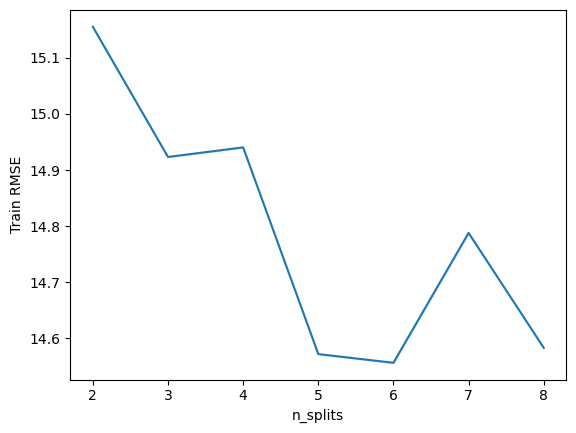

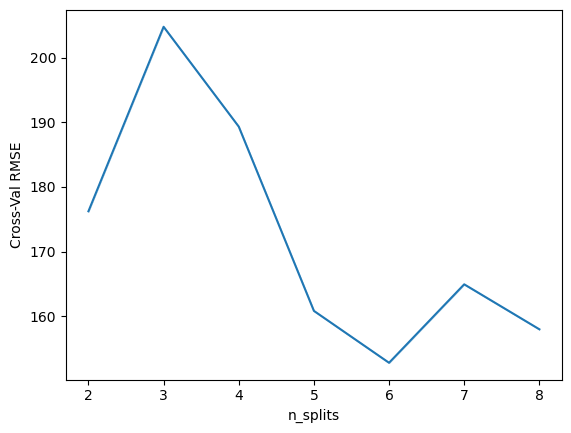

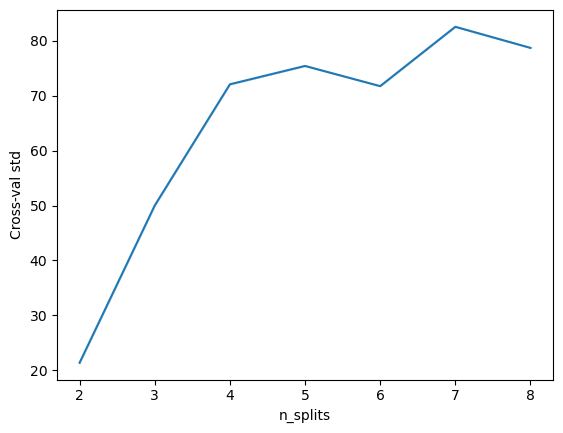

In [33]:
tradeoff = pd.read_csv('functions/tradeoff.csv', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tradeoff, x='n_splits', y='Train RMSE')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-Val RMSE')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-val std')
plt.show()


We'll use 6 splits, for a good balance between bias, variance and execution time:

In [34]:
N_SPLITS = 6
global_variables['N_SPLITS'] = N_SPLITS
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

## 01. LightGBM on unprocessed data

Let's find Scores and Test RMSE for this number of splits:

In [35]:
%%time

# UNCOMMENT TO INSTALL LightGBM
#!pip install lightgbm
import lightgbm as lgb

study_number = '01'

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1)

# Calculate scores
from functions.get_score import get_score

train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                   train_unprocessed,
                                                                   test_unprocessed,
                                                                   model, scores_df,
                                                        comment="LightGBM on unprocessed data")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 55.2 s
Wall time: 6.17 s


In [36]:
scores_df.loc[int(study_number), 'Test RMSE'] = 47.78191
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191


## Date and WeekCount

Let's create time features, a date and a week count:

In [37]:
train = train_unprocessed.copy(deep=True)
test = test_unprocessed.copy(deep=True)

# Create a 'date' feature
train['date'] = pd.to_datetime(train_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(train_unprocessed.week_no.mul(7).astype(str) + ' days')
test['date'] = pd.to_datetime(test_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(test_unprocessed.week_no.mul(7).astype(str) + ' days')

# Create WeekCount feature
feature_name = 'WeekCount'
for data in [train, test]:
    
    data[feature_name] = (data['year'] - 2019) * 53 + data['week_no']
    
    print(data[feature_name].info())
    print(data[feature_name].describe())



<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
79023 non-null  int64
dtypes: int64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        79.000000
std         45.898729
min          0.000000
25%         39.000000
50%         79.000000
75%        119.000000
max        158.000000
Name: WeekCount, dtype: float64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
24353 non-null  int64
dtypes: int64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean       183.000000
std         14.142426
min        159.000000
25%        171.000000
50%        183.000000
75%        195.000000
max        207.000000
Name: WeekCount, dtype: float64


## Location Types

Note, latitude and longitude do not fully make sence as numerical features. Instead, we shall create a categorical feature Location, which will be a combination of latitude and longitude:

In [38]:
feature_name = 'Location'

# Create a new feature
for data in [train, test]:
    data[feature_name] = data['latitude'].astype('string') + data['longitude'].astype('string')
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  string
dtypes: string(1)
memory usage: 3.2+ MB
None
count          79023
unique           497
top       -0.5129.29
freq             159
Name: Location, dtype: object
Unique Values and their count:
-0.5129.29      159
-0.72629.374    159
-0.54729.653    159
-0.56930.031    159
-0.59829.102    159
               ... 
-3.15330.347    159
-3.16128.839    159
-3.17429.926    159
-3.28729.713    159
-3.29930.301    159
Name: Location, Length: 497, dtype: Int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  string
dtypes: string(1)
memory usage: 380.5+ KB
None
count          24353
unique           497
top       -0.5129.29
freq              49
Name: Locatio

Alright, we have 497 unique locations. Let's try to identify groups of locations with similar 'emission' patterns:

In [39]:
## Create a pivot table

location_table = pd.pivot_table(train, index='date', columns='Location', values='emission')

location_table.head()

Location,-0.5129.29,-0.52829.472,-0.54729.653,-0.56930.031,-0.59829.102,-0.60429.896,-0.61530.885,-0.62729.773,-0.63730.763,-0.65330.447,...,-3.09529.505,-3.09929.601,-3.13329.467,-3.13630.364,-3.13830.662,-3.15330.347,-3.16128.839,-3.17429.926,-3.28729.713,-3.29930.301
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.750994,3.857115,0.500023,100.382980,0.076542,64.49460,76.600110,101.643295,40.153328,28.108765,...,5.375411,69.82686,105.982190,14.774838,23.184301,15.069341,0.106631,41.193130,39.696404,26.111166
2019-01-08,4.025176,4.213432,0.529315,106.375980,0.081001,68.42294,82.630714,109.828674,41.531597,29.032100,...,5.420106,74.35756,113.068474,15.337234,24.404161,16.217907,0.112878,43.877285,43.529408,28.045977
2019-01-15,4.231381,4.451489,0.554183,110.766335,0.084788,71.01155,86.668290,115.189064,42.774483,29.870031,...,5.327792,77.72222,118.279810,15.730142,25.097378,16.811665,0.118181,45.760826,45.993286,29.293518
2019-01-22,4.305286,4.553981,0.561553,113.097940,0.085920,72.57178,88.741880,117.846870,43.542730,30.415354,...,5.422680,79.23992,120.618580,15.979696,25.591475,17.231894,0.119753,46.675327,47.163128,29.950650
2019-01-29,4.347317,4.676066,0.559731,114.985886,0.085650,73.83461,91.137010,120.702270,43.739470,30.567698,...,5.316918,80.32427,122.382960,15.905249,25.756530,17.642060,0.119364,47.317184,48.742470,30.572742


We'll create an elbow plot of explained variance by number of principal components:

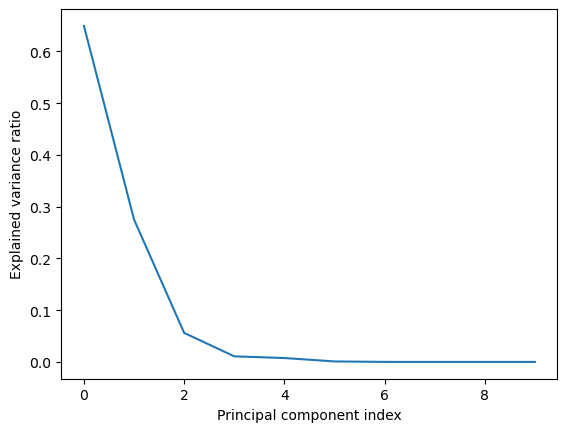

CPU times: total: 172 ms
Wall time: 169 ms


In [40]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

# Fit PCA
pca.fit(location_table)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

2 components explain most of the variance. Let's find the special locations:

In [41]:
%%time

# Recalculate PCA 
pca = PCA(n_components = 2)
pca.fit(location_table)

# Create importance dataframes
location_importances = pd.DataFrame(np.transpose(abs(pca.components_)), index = location_table.columns, columns=['PC1', "PC2"])


print('Locations sorted by PC1 imortance:')
location_importances.sort_values(by='PC1', ascending=False).head(10)

Locations sorted by PC1 imortance:
CPU times: total: 0 ns
Wall time: 14.5 ms


,PC1,PC2
Location,,
-2.07929.321,0.991361,0.088617
-2.37829.222,0.050352,0.164703
-1.34631.254,0.024180,0.048800
-1.51429.686,0.020555,0.189729
-1.31930.281,0.019428,0.149098
-2.33529.665,0.019208,0.137005
-2.15429.946,0.018832,0.142713
-0.95630.744,0.017227,0.044920
-1.88230.018,0.017226,0.120596


In [42]:
print('Locations sorted by PC2 imortance:')
location_importances.sort_values(by='PC2', ascending=False).head(10)

Locations sorted by PC2 imortance:


,PC1,PC2
Location,,
-1.51429.686,0.020555,0.189729
-2.59929.801,0.009692,0.184982
-2.37829.222,0.050352,0.164703
-1.48629.614,0.011875,0.160348
-2.29329.507,0.013203,0.160082
-2.37629.924,0.005365,0.150127
-1.31930.281,0.019428,0.149098
-2.15429.946,0.018832,0.142713
-2.33529.665,0.019208,0.137005


In [43]:
special_locations = location_importances.sort_values(by='PC1', ascending=False).index[:2].tolist()
    
special_locations

['-2.07929.321', '-2.37829.222']

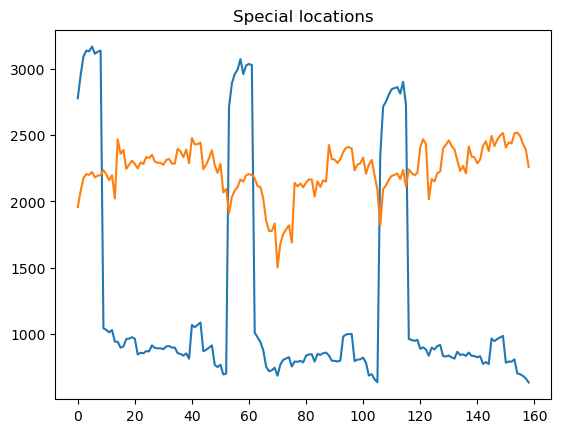

CPU times: total: 219 ms
Wall time: 186 ms


In [44]:
%%time


for location in special_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)
plt.title('Special locations')
plt.show()

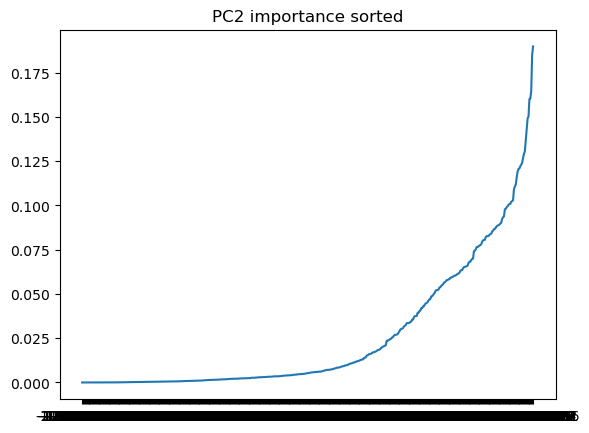

In [45]:
plt.plot(location_importances['PC2'].sort_values(ascending=True))
plt.title('PC2 importance sorted')
plt.show()

Playing with border_importane parameter we can separate the rest of locations in two distinct groups with common patterns:

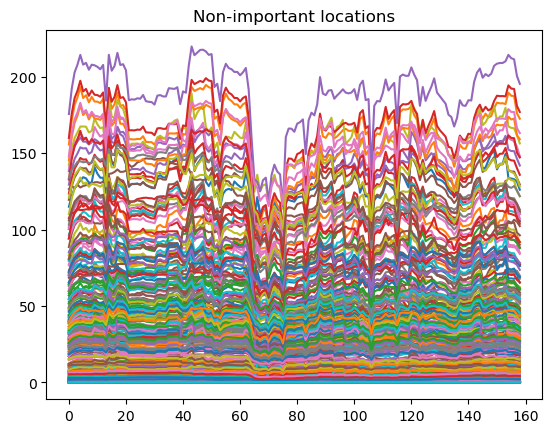

CPU times: total: 266 ms
Wall time: 436 ms


In [46]:
%%time

border_importance = location_importances['PC2'].quantile(0.65)

non_important_locations = location_importances.loc[location_importances['PC2'] < border_importance].index.to_list()
important_locations = location_importances.loc[location_importances['PC2'] >= border_importance].index.to_list()
important_locations = list(set(important_locations) - set(special_locations))
assert(len(non_important_locations) + len(important_locations) + len(special_locations) == len(location_table.columns))

for location in non_important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)  

plt.title('Non-important locations')
plt.show()

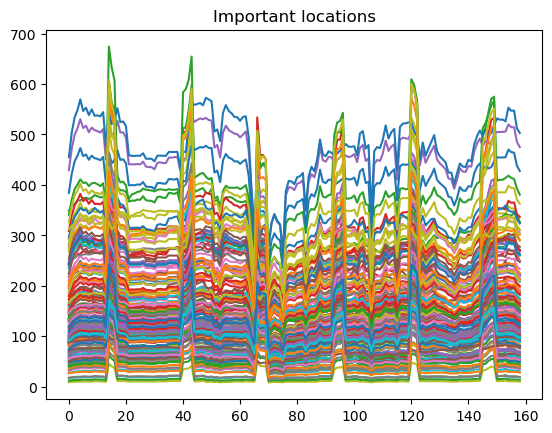

CPU times: total: 203 ms
Wall time: 334 ms


In [47]:
%%time

for location in important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)    
plt.title('Important locations')
plt.show()

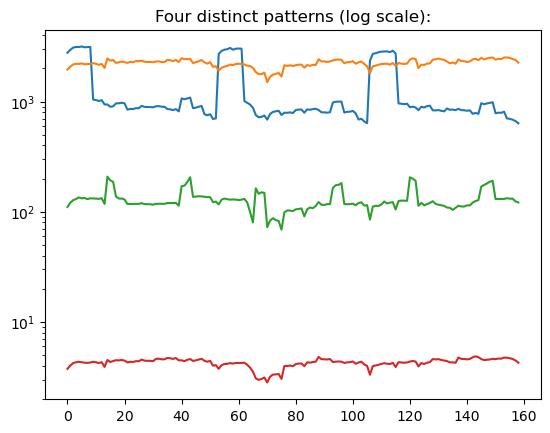

In [48]:
four_representatives = special_locations.copy()
four_representatives.append(important_locations[1])
four_representatives.append(non_important_locations[0])

fig, ax = plt.subplots()
for location in four_representatives:
    series = location_table[location]
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns (log scale):')
ax.set_yscale('log')
plt.show()

One of the special locations has a pattern similar to the patterns for the low emissions locations, but, since it has high emission, I will still explore it separately.

In [49]:
%%time

feature_name = 'Location_group'

location_importances[feature_name] = ['High' if location in important_locations else \
                           'Low' if location in non_important_locations else \
                          "Special 1" if location == special_locations[0] else \
                          "Special 2" if location == special_locations[1] else \
                          "ERROR" for location in location_importances.index]

for data in [train, test]:
    
    data[feature_name] = data["Location"].map(location_importances[feature_name])
    
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())


<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB
None
count     79023
unique        4
top         Low
freq      51357
Name: Location_group, dtype: object
Unique Values and their count:
Low          51357
High         27348
Special 1      159
Special 2      159
Name: Location_group, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  object
dtypes: object(1)
memory usage: 380.5+ KB
None
count     24353
unique        4
top         Low
freq      15827
Name: Location_group, dtype: object
Unique Values and their count:
Low          15827
High          8428
Special 1       49
Special 2       49
Name: Location_group, dtype: int64
CPU time

## 02. Remove COVID period

As AmbrosM described, the emissions were affected by one-time event: the COVID pandemic.

My approach here will be to exclude the COVID drop period from the dataset.


First, let's find the dates of COVID pattern in the Low group:

<timed exec>:9: UserWarning: FixedFormatter should only be used together with FixedLocator


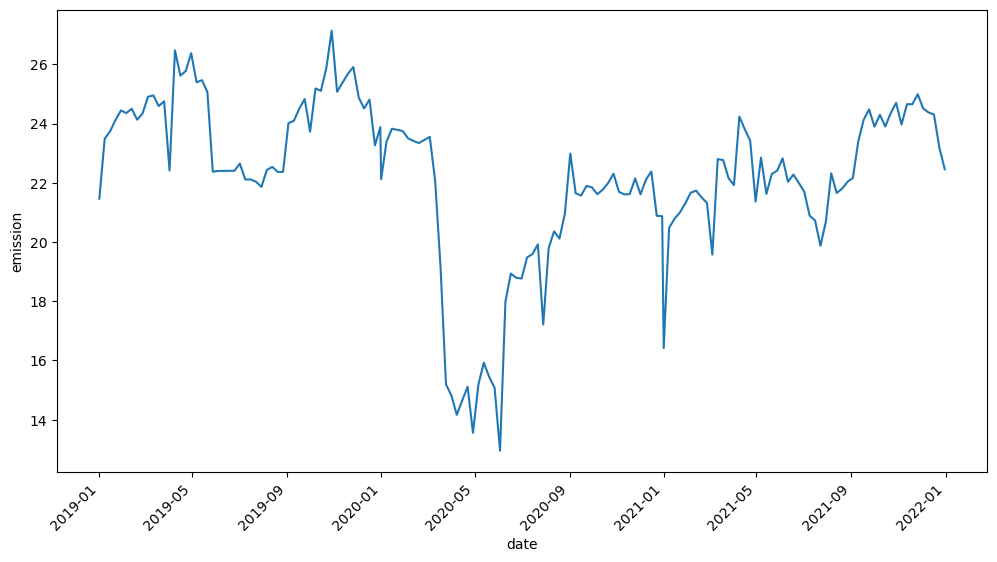

CPU times: total: 219 ms
Wall time: 326 ms


In [50]:
%%time

study_number = '02'

train_and_test = pd.concat([train, test])
train_and_test_low = train_and_test.loc[train_and_test["Location_group"] == 'Low']
train_and_test_low_by_date = train_and_test_low.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_low_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [51]:
print('Dates with lowest emissions:')
train_and_test_low_by_date['emission'].median().sort_values().head(35).sort_index()

Dates with lowest emissions:


date
2020-03-18    19.134401
2020-03-25    15.197190
2020-04-01    14.818518
2020-04-08    14.165483
2020-04-15    14.648009
2020-04-22    15.114670
2020-04-29    13.556390
2020-05-06    15.189357
2020-05-13    15.925202
2020-05-20    15.443724
2020-05-27    15.075055
2020-06-03    12.953855
2020-06-10    17.988222
2020-06-17    18.936085
2020-06-24    18.791813
2020-07-01    18.766336
2020-07-08    19.481113
2020-07-15    19.591595
2020-07-22    19.919827
2020-07-29    17.214808
2020-08-05    19.795933
2020-08-12    20.358725
2020-08-19    20.114641
2020-08-26    20.960009
2020-12-23    20.886156
2020-12-30    20.871677
2021-01-01    16.419092
2021-01-08    20.478285
2021-01-15    20.783508
2021-01-22    20.999780
2021-03-05    19.574919
2021-07-09    20.889560
2021-07-16    20.729810
2021-07-23    19.872679
2021-07-30    20.683060
Name: emission, dtype: float64

Here we can see that the drop started at 2020-03-18 and finished at 2020-08-26.

Now, let's look at the High group:

<timed exec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator


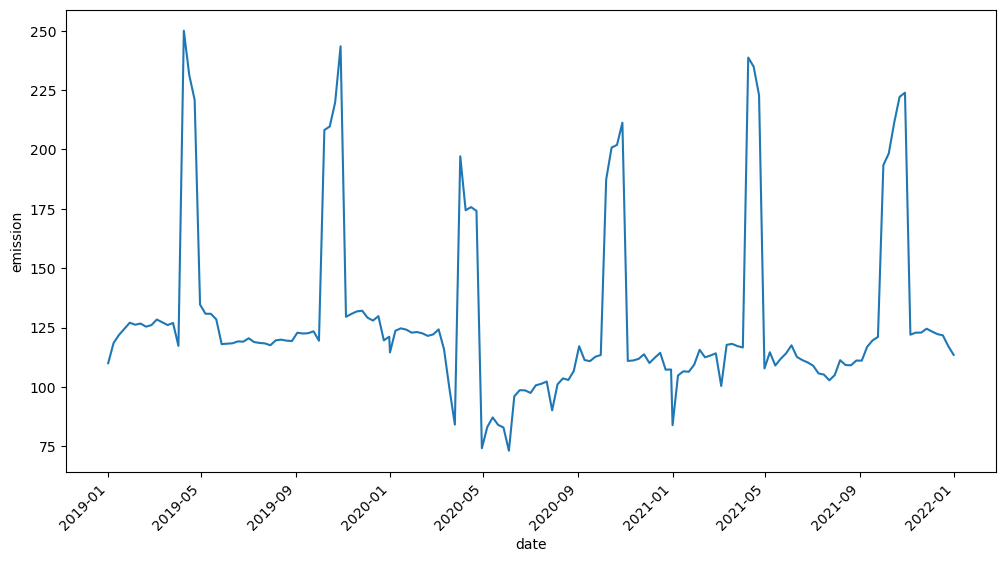

Dates with lowest emissions:
CPU times: total: 172 ms
Wall time: 238 ms


date
2020-03-18     99.259068
2020-03-25     84.085532
2020-04-29     74.142530
2020-05-06     83.065750
2020-05-13     87.126493
2020-05-20     84.002552
2020-05-27     82.864621
2020-06-03     73.098295
2020-06-10     96.012905
2020-06-17     98.596475
2020-06-24     98.524512
2020-07-01     97.441265
2020-07-08    100.681434
2020-07-15    101.294815
2020-07-22    102.242162
2020-07-29     90.091030
2020-08-05    101.072553
2020-08-12    103.565370
2020-08-19    102.905435
2020-08-26    106.650352
2020-12-23    107.233415
2020-12-30    107.319817
2021-01-01     83.852945
2021-01-08    104.786550
2021-01-15    106.572760
2021-01-22    106.352975
2021-03-05    100.367595
2021-04-30    107.747749
2021-05-14    108.997302
2021-07-02    108.945240
2021-07-09    105.672485
2021-07-16    105.171747
2021-07-23    102.764980
2021-07-30    104.959855
2021-08-20    109.085270
Name: emission, dtype: float64

In [52]:
%%time

train_and_test_high = train_and_test.loc[train_and_test["Location_group"] == 'High']
train_and_test_high_by_date = train_and_test_high.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_high_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

print('Dates with lowest emissions:')
train_and_test_high_by_date['emission'].median().sort_values().head(35).sort_index()



Same period. Let's exclude this period and look if this improves our scores. 

In [53]:
%%time

covid_start = pd.to_datetime('2020-03-18')
covid_finish = pd.to_datetime('2020-08-26')


train_no_covid = train.loc[(train['date'] < covid_start) | 
                                                (train['date'] > covid_finish)  , :]

train.to_csv('new_datasets/train_with_covid_1_{}.csv'.format(study_number))
train_no_covid.to_csv('new_datasets/train_no_covid_1_{}.csv'.format(study_number))

# Remove all new columns
selected_columns = list(set(test.columns) - {'date', 'WeekCount', 'Location', 'Location_group'})

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]


train_selected.to_csv('new_datasets/train_1_02.csv')
test_selected.to_csv('new_datasets/test_1_02.csv')


CPU times: total: 12.9 s
Wall time: 19 s


I recalculated the number of splits in ['functons/n_splits_2.py']('functons/n_splits_2.py') and found that 6 splits is still optimal for the truncated dataset.

In [54]:
%%time

train_score, cross_score, cross_scores_std, submission = \
                get_score(global_variables, train_selected, test_selected, model, scores_df,
                                        comment="No covid")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 50.4 s
Wall time: 5.51 s


In [55]:
scores_df.loc[int(study_number), 'Test RMSE'] = 45.00252
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252


Change in Cross-val score is not representative, since we have less data, so we'll consider improvement of Test RMSE as a good sign.

Next, let's try to introduce WeekCount:

## 03. WeekCount

In [56]:
%%time

study_number = '03'

selected_columns.append('WeekCount')

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]

train_score, cross_score, cross_scores_std, submission = \
                get_score(global_variables, train_selected, test_selected, model, scores_df,
                                        comment="+ WeekCount")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 49.3 s
Wall time: 5.37 s


In [57]:
scores_df.loc[int(study_number), 'Test RMSE'] = 44.98007
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007


We have a slight increase of Cross-val RMSE, so we'll remove this feature.

In [58]:
selected_columns.remove('WeekCount')

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]

## 04. Location_enc

We have 497 unique locations. We need to express Location as a numerical feature (or features). We'll create a feature Location_enc, using Mean Target Encoding, so locations with similar mean emissions (in the training set) will have similar Location_enc values.


In [59]:
study_number = '04'

# Change the datasets name to more convinient

no_covid_len = len(train_no_covid)
train = train_no_covid.copy(deep=True)


# !pip install feature_engine
from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['Location'] = train['Location'].astype('category')
test['Location'] = test['Location'].astype('category')

train['Location_enc'] = encoder.fit_transform(train[['Location']], train['emission'])
test['Location_enc'] = encoder.transform(test[['Location']])

feature_name = 'Location_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std        141.554103
min          0.000000
25%         11.277943
50%         48.129771
75%        115.427646
max       2280.935267
Name: Location_enc, dtype: float64
Unique Values and their count:
0.000000      2025
4.377785       135
104.414210     135
315.244824     135
345.406888     135
              ... 
42.862704      135
116.942048     135
68.303494      135
90.549574      135
28.512338      135
Name: Location_enc, Length: 483, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+

Let's test:

In [60]:
%%time

selected_columns.append('Location_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="2 + Location_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 46.1 s
Wall time: 4.78 s


In [61]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.14359
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359


Great, that worked. What if we'll do the same trick with Week of the year?

## 05. Week of the year Mean Target Encoding

In [62]:
study_number = '05'

from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['week_no_category'] = train['week_no'].astype('category')
test['week_no_category'] = test['week_no'].astype('category')

train['week_no_enc'] = encoder.fit_transform(train[['week_no_category']], train['emission'])
test['week_no_enc'] = encoder.transform(test[['week_no_category']])

feature_name = 'week_no_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: week_no_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std         11.329124
min         72.088003
25%         77.936882
50%         81.144497
75%         84.303210
max        122.231922
Name: week_no_enc, dtype: float64
Unique Values and their count:
72.088003     1491
115.211546    1491
79.366690     1491
79.985492     1491
80.843326     1491
86.388165     1491
103.587349    1491
106.899378    1491
110.402315    1491
81.144497     1491
80.885773     1491
81.831373     1491
82.322285     1491
83.484188     1491
81.286079     1491
80.913570     1491
81.764307     1491
76.659700     1491
79.200567     1491
76.113475     1491
83.061364     1491
83.517704     1491
84.689304     1491
85.618840     1491
84.984527     1491
84.303210     1491
84.936751  

Let's test:

In [63]:
%%time

selected_columns.append('week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ week_no_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 47.2 s
Wall time: 4.86 s


In [64]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.189
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900


Nope, that didn't work. Let's remove this feature.

In [65]:
selected_columns.remove('week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]


## 06. Location_group_enc

Now, let's encode in the same way our Location Groups:

In [66]:
study_number = '06'

encoder = MeanEncoder()

train['Location_group'] = train['Location_group'].astype('category')
test['Location_group'] = test['Location_group'].astype('category')

train['Location_group_enc'] = encoder.fit_transform(train[['Location_group']], train['emission'])
test['Location_group_enc'] = encoder.transform(test[['Location_group']])

feature_name = 'Location_group_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_group_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std        127.263173
min         34.415806
25%         34.415806
50%         34.415806
75%        158.718906
max       2280.935267
Name: Location_group_enc, dtype: float64
Unique Values and their count:
34.415806      43605
158.718906     23220
1295.799952      135
2280.935267      135
Name: Location_group_enc, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_group_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean        84.492339
std        127.264838
min         34.415806
25%         34.41

In [67]:
%%time

selected_columns.append('Location_group_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="4 + Location_group_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 48.6 s
Wall time: 5.16 s


In [68]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.20915
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915


Good, Cross-val RMSE went down, so the feature stays.

## 07. LightGBM tuning

Here we'll do hyperparameters tuning of the LightGBM regressor with n_estimators = 100. 

All the hyperparameters tuning will be done in separate files, for the sake of runtime. In this case, in ['studies/1_07.py']('studies/1_07.py').

In [69]:
study_number = '07'

train_selected.to_csv('new_datasets/train_1_{}.csv'.format(study_number))
test_selected.to_csv('new_datasets/test_1_{}.csv'.format(study_number))

In [70]:
import pickle

with open('studies/1_' + study_number + '_params.pkl', 'rb') as f:
    best_params = pickle.load(f)
    
# print("Best Cross-val RMSE:", study.best_trial.value)
print("Best hyperparameters:", best_params)

Best hyperparameters: {'num_leaves': 60, 'max_depth': 20, 'learning_rate': 0.13123577914490067, 'min_child_weight': 30.502797736087448, 'min_child_samples': 60, 'subsample': 0.5, 'subsample_freq': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.32954349026120533, 'reg_lambda': 99.58026125458638}


Let's test:

In [71]:
%%time

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1, **best_params)

train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                   train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ tuning")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 56.7 s
Wall time: 5.93 s


In [72]:
scores_df.loc[int(study_number), 'Test RMSE'] = 45.61363
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363


The Test RMSE went up. It seems that the tuning overfitted the model to the cross-validation splits. 

We'll use the standard parameters then.
Let's look at feature importances:

In [73]:
%%time

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1)

## Train the model on the whole training set
model.fit(train_selected.drop(['emission'], axis=1), train['emission'])

feature_importances = pd.Series(data=model.feature_importances_, 
                                index=train_selected.drop(['emission'], axis=1).columns)

print('Sorted feature importances (first 40):')
feature_importances.sort_values(ascending=False).head(40)

Sorted feature importances (first 40):
CPU times: total: 7.34 s
Wall time: 845 ms


Location_enc                                               685
week_no                                                    464
longitude                                                  196
latitude                                                   194
Location_group_enc                                         121
Ozone_O3_column_number_density                             114
year                                                        97
CarbonMonoxide_CO_column_number_density                     87
Ozone_solar_azimuth_angle                                   71
Cloud_solar_azimuth_angle                                   60
Cloud_surface_albedo                                        54
CarbonMonoxide_solar_azimuth_angle                          53
UvAerosolIndex_absorbing_aerosol_index                      45
UvAerosolIndex_solar_azimuth_angle                          43
UvAerosolIndex_solar_zenith_angle                           42
Ozone_O3_slant_column_number_density                   

Even though we have 'Location_enc' and Location_group_enc, latitudes and longitudes are still important. That gives me an idea for the next step:


## 08. Geographical clustering

The importance of latitude and longitude suggest benefits of creating location clusters: groups of locations that situated nearby. We'll also account for 'emissions' to make clusters depending on similar emissions.

First we'll create an elbow plot to detrmine an optimal number of clusters:

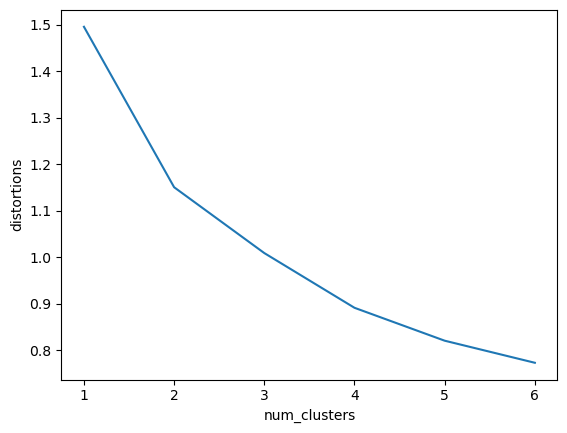

CPU times: total: 2.48 s
Wall time: 2.72 s


In [74]:
%%time

study_number = '08'

from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns


# Create cluster data
cluster_data = train[['latitude', 'longitude', 'emission']]

# Normalize data
cluster_data = pd.DataFrame(StandardScaler().fit_transform(cluster_data),
                            columns=['latitude', 'longitude', 'emission'],
                           index=cluster_data.index)

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(cluster_data, k_or_guess=i, seed=SEED)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

It seems that the optimal number of clusters is 2. Let's look how they are situated geographically:

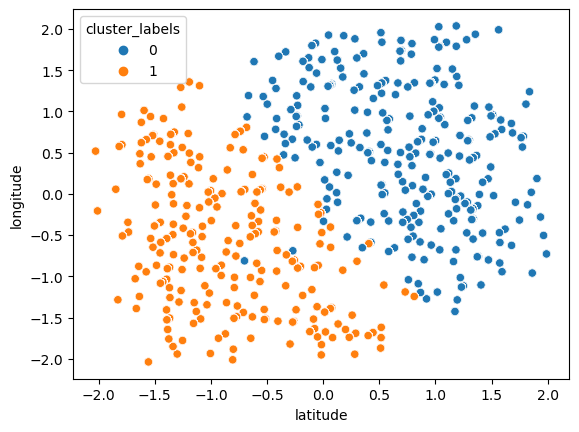

CPU times: total: 1.48 s
Wall time: 2.18 s


In [75]:
%%time

cluster_centers, distortion = kmeans(cluster_data, k_or_guess=2, seed=SEED)


# Assign cluster labels
cluster_data['cluster_labels'], _ = vq(cluster_data, cluster_centers)


# Create a scatter plot
sns.scatterplot(x='latitude', y='longitude', hue='cluster_labels', data=cluster_data)
plt.show()

Quite a nice geographical border with just a few outliers (due to 'emission'). Let's test:

In [76]:
%%time

# Save the cluster labels into train and set
clusters = pd.concat([train['Location'], cluster_data['cluster_labels']], axis=1)
clusters = pd.pivot_table(clusters, values=['cluster_labels'], index=['Location'])
clusters = pd.Series(clusters['cluster_labels'])

train['Location_cluster_2'] = train['Location'].map(clusters)
test['Location_cluster_2'] = test['Location'].map(clusters)

selected_columns.append('Location_cluster_2')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                     train_selected,
                                                                     test_selected, 
                                                                      model, scores_df,
                                                                  comment="6 + Location_cluster_2")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 49.3 s
Wall time: 5.55 s


In [77]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN


Indeed, there is a small improvement.

## 09. Filling NaNs based on 2 features

Now we'll use the 2 most important features in calculating distances for kNN imputaton of missing values. They contain information about location and week of the year.

The cell below took a long time to execute, so I saved the results into files to not re-run this cell Uncomment the cell to re-run.

In [78]:
%%time

study_number = '09'

train_selected_filled = pd.read_csv('new_datasets/train_selected_filled.csv',
                                    index_col='ID_LAT_LON_YEAR_WEEK')
test_selected_filled = pd.read_csv('new_datasets/test_selected_filled.csv',
                               index_col='ID_LAT_LON_YEAR_WEEK')

# from sklearn.impute import KNNImputer

# # define imputer
# imputer = KNNImputer(weights='distance')

# # The most important features 
# selected_columns_1 = list(feature_importances.sort_values(ascending=False).index[:2])
# features_train = train[selected_columns_1]
# features_test =  test[selected_columns_1]

# #Dataframes to fill
# train_selected_filled = train_selected.copy(deep=True)
# test_selected_filled = test_selected.copy(deep=True)


# # For each column with missing values
# for column in list(train_selected.columns[train_selected.isna().any()]):
    
#     # Create a DataFrame of a feature with missing values and the most important features
#     df_to_fill_train = pd.concat([train[column], features_train], axis=1)
#     df_to_fill_test = pd.concat([test[column], features_test], axis=1)
                                  
#     # fit on the dataset
#     imputer.fit(df_to_fill_train)
#     # transform the datasets
#     Xtrans = imputer.transform(df_to_fill_train)
#     train_selected_filled[column] = Xtrans[:, 0]
#     Xtrans = imputer.transform(df_to_fill_test)
#     test_selected_filled[column] = Xtrans[:, 0]



CPU times: total: 844 ms
Wall time: 1.23 s


In [79]:
print(train_selected_filled.info())
print(test_selected_filled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 78 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Cloud_cloud_optical_depth                                 67095 non-null  float64
 1   SulphurDioxide_cloud_fraction                             67095 non-null  float64
 2   SulphurDioxide_SO2_column_number_density_15km             67095 non-null  float64
 3   UvAerosolLayerHeight_sensor_azimuth_angle                 67095 non-null  float64
 4   CarbonMonoxide_solar_zenith_angle                         67095 non-null  float64
 5   UvAerosolLayerHeight_aerosol_pressure                     67095 non-null  float64
 6   Formaldehyde_sensor_azimuth_angle                         67095 non-null  float64
 7   UvAerosolIndex_sensor_altitude                            67095 no

In [80]:
train_selected_filled.to_csv('new_datasets/train_selected_filled.csv')
test_selected_filled.to_csv('new_datasets/test_selected_filled.csv')

In [81]:
%%time

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment=" + Filled based on 2")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 42.5 s
Wall time: 4.38 s


In [82]:
scores_df.loc[int(study_number), 'Test RMSE'] = 42.76071
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


Since we filled missing values using the whole training set, we need to look at Test RMSE to evaluate if filling works. And we can see that it doesn't.

## 10. Filling NaNs based on all features

Now we'll use all features in calculating distances for kNN imputaton of missing values. 

Uncomment to re-run.


In [83]:
%%time

study_number = '10'

train_selected_filled = pd.read_csv('new_datasets/train_selected_filled_10.csv',
                                    index_col='ID_LAT_LON_YEAR_WEEK')
test_selected_filled = pd.read_csv('new_datasets/test_selected_filled_10.csv',
                               index_col='ID_LAT_LON_YEAR_WEEK')
assert(len(train_selected_filled) == no_covid_len)


# from sklearn.impute import KNNImputer

# # define imputer
# imputer = KNNImputer(weights='distance')

# print(len(train_selected))

# # define imputer
# imputer = KNNImputer(weights='distance')
# # fit on the dataset and transform the datasets
# Xtrans = imputer.fit_transform(train_selected.drop('emission', axis=1))

# print(len(Xtrans))

# train_selected_filled = pd.DataFrame(Xtrans, index=train_selected.index)

# print(len(train_selected_filled))

# train_selected_filled = pd.concat([train_selected_filled, train_selected['emission']], axis=1)
# train_selected_filled.columns = train_selected.columns

# print(len(train_selected_filled))

# Xtrans = imputer.transform(test_selected)
# test_selected_filled = pd.DataFrame(Xtrans, index=test_selected.index, columns=test_selected.columns)

# assert(len(train_selected_filled) == no_covid_len)

CPU times: total: 766 ms
Wall time: 1.02 s


In [84]:
print(train_selected_filled.info())
print(test_selected_filled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 78 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Ozone_O3_slant_column_number_density                      67095 non-null  float64
 1   Ozone_O3_effective_temperature                            67095 non-null  float64
 2   SulphurDioxide_SO2_column_number_density                  67095 non-null  float64
 3   SulphurDioxide_solar_azimuth_angle                        67095 non-null  float64
 4   SulphurDioxide_solar_zenith_angle                         67095 non-null  float64
 5   CarbonMonoxide_H2O_column_number_density                  67095 non-null  float64
 6   SulphurDioxide_cloud_fraction                             67095 non-null  float64
 7   UvAerosolIndex_solar_azimuth_angle                        67095 no

In [85]:
train_selected_filled.to_csv('new_datasets/train_selected_filled_10.csv')
test_selected_filled.to_csv('new_datasets/test_selected_filled_10.csv')

In [86]:
%%time

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="8 + Filled based on all")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 43.8 s
Wall time: 4.71 s


In [87]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.79606
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


Since we filled missing values using the whole training set, we need to look at Test RMSE to evaluate if filling works. Alright, this filling works.


## 11. week_no_enc revisited

Note, our Test RMSE for adding week_no_enc at step 05 was quite good, but we rejected week_no_enc because of Cross-val RMSE. What if we introduce it now, when we have more features and no NaNs?

In [88]:
%%time

study_number = '11'

train_selected_filled['week_no_enc'] = train['week_no_enc']
test_selected_filled['week_no_enc'] = test['week_no_enc']


#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="+ week_no_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 48.7 s
Wall time: 6.67 s


In [89]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


Now Cross-val Score went down, so week_no_enc stays.

## 12. Adding time series forecast

(From ['CO2 Emissions 2.ipynb']('CO2 Emissions 2.ipynb'))

In [90]:
%%time

study_number = '12'

train_selected_filled['emission_pred_2_04'] = pd.read_csv('new_datasets/train_nocovid_2_final',
                    index_col='ID_LAT_LON_YEAR_WEEK',
                                usecols=['ID_LAT_LON_YEAR_WEEK', 'emission_pred_2_04'])

test_selected_filled['emission_pred_2_04'] = pd.read_csv('new_datasets/test_2_final',
                    index_col='ID_LAT_LON_YEAR_WEEK',
                                usecols=['ID_LAT_LON_YEAR_WEEK', 'emission_pred_2_04'])

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="+ Forecast")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 50.1 s
Wall time: 6.36 s


In [91]:
scores_df.loc[int(study_number), 'Test RMSE'] = scores_df.loc[int(study_number), 'Test RMSE'] = 32.05271
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


Good, this feature stays.

## 13. Locaton AND Week of the year Mean Target Encoding

In [92]:
%%time

study_number = '13'

# Create a new categorical feature
train['Location_week_no'] = (train['Location'].astype('str') + train['week_no'].astype('str')).astype('category')
test['Location_week_no'] = (test['Location'].astype('str') + test['week_no'].astype('str')).astype('category')



# Encode
train['Location_week_no_enc'] = encoder.fit_transform(train[['Location_week_no']], train['emission'])
test['Location_week_no_enc'] = encoder.transform(test[['Location_week_no']])

# Copy

train_selected_filled['Location_week_no_enc'] = train['Location_week_no_enc']
test_selected_filled['Location_week_no_enc'] = test['Location_week_no_enc']

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="+ Location_week_no_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)


CPU times: total: 45.2 s
Wall time: 5.18 s


In [93]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


Feature stays.

## 14. Adding 'Max_x_groups' forecast from part 3

(From ['CO2 Emissions 3.ipynb']('CO2 Emissions 3.ipynb'))

In [94]:
%%time

study_number = '14'

train_selected_filled['Max_x_groups'] = pd.read_csv('new_datasets/train_3_final.csv',
                    index_col='ID_LAT_LON_YEAR_WEEK',
                                usecols=['ID_LAT_LON_YEAR_WEEK', 'Max_x_groups'])

test_selected_filled['Max_x_groups'] = pd.read_csv('new_datasets/test_3_final.csv',
                    index_col='ID_LAT_LON_YEAR_WEEK',
                                usecols=['ID_LAT_LON_YEAR_WEEK', 'Max_x_groups'])

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="+ Max_x_groups")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 45.9 s
Wall time: 5.78 s


In [95]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


Feature stays.

## 15. Clustering

What if we do clustering using all our features? Unlice in study 08, the clustering will be done not on locations, but on rows, and we won't use 'emission' in distance calculation. We'll use 'emission' in Mean Trget Encoding of the cluster labels.

First we'll create an elbow plot to determine an optimal number of clusters:

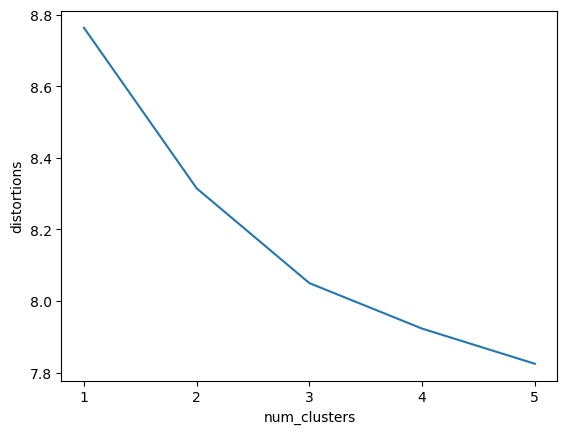

CPU times: total: 7min
Wall time: 2min 26s


In [96]:
%%time

study_number = '15'

scaler=StandardScaler()

# Normalize data
cluster_data = pd.DataFrame(scaler.fit_transform(train_selected_filled.drop('emission', axis=1)))

distortions = []
num_clusters = range(1, 6)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(cluster_data, k_or_guess=i, seed=SEED)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

It seems that the optimal number of clusters is 3.

In [97]:
%%time

number_of_clusters = 3

cluster_centers, distortion = kmeans(cluster_data, k_or_guess=number_of_clusters, seed=SEED)


# Assign cluster labels to train
cluster_data['cluster_labels'], _ = vq(cluster_data, cluster_centers)
train['Cluster_3'] = cluster_data['cluster_labels'].values
train['Cluster_3'] = train['Cluster_3'].astype('category')


CPU times: total: 1min 8s
Wall time: 24.3 s


In [98]:
%%time

# Assign cluster labels to test
cluster_data_test = pd.DataFrame(scaler.transform(test_selected_filled))
cluster_centers, distortion = kmeans(cluster_data_test, k_or_guess=number_of_clusters, seed=SEED)
cluster_data_test['cluster_labels'], _ = vq(cluster_data_test, cluster_centers)
test['Cluster_3'] = cluster_data_test['cluster_labels'].values
test['Cluster_3'] = test['Cluster_3'].astype('category')


CPU times: total: 43.7 s
Wall time: 12.9 s


In [99]:
test['Cluster_3'].info()

<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Cluster_3
Non-Null Count  Dtype   
--------------  -----   
24353 non-null  category
dtypes: category(1)
memory usage: 214.2+ KB


In [100]:
%%time

# Encode the categorical feature 

train['Cluster_3_enc'] = encoder.fit_transform(train[['Cluster_3']], train['emission'])
test['Cluster_3_enc'] = encoder.transform(test[['Cluster_3']])

feature_name = 'Cluster_3_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Cluster_3_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std          2.897870
min         79.785054
25%         79.785054
50%         85.846788
75%         86.674554
max         86.674554
Name: Cluster_3_enc, dtype: float64
Unique Values and their count:
85.846788    25069
86.674554    23786
79.785054    18240
Name: Cluster_3_enc, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Cluster_3_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean        84.188165
std          3.009755
min         79.785054
25%         79.785054
50%         85.846788
75%         86.67455

In [101]:
## Append the new feature
train_selected_filled['Cluster_3_enc'] = train['Cluster_3_enc']
test_selected_filled['Cluster_3_enc'] = test['Cluster_3_enc']


#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                     train_selected_filled,
                                                                     test_selected_filled, 
                                                                      model, scores_df,
                                                                  comment="+ Cluster_3_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [102]:
scores_df.loc[int(study_number), 'Test RMSE'] = 32.41069
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.18900
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


## Saving predictions

At this point, let's save the predictions of our best model into a separate feature: 'pred_1'.

Then we'll subtract this feature from 'emission' to get 'emission_1'

In the future steps we may try to predict this feature and then convert it into 'emission'.

Additionally, for the next steps we'll use simpler cross-validation: we'll just split our 'train' once on a training and cross-validation sets.

Let's set up and test everything:

In [103]:
# Change the names to more convenient

train_and_cv_unfilled = train.copy(deep=True)
test_unfilled = test.copy(deep=True)

In [104]:
X_train_and_cv = train_selected_filled.drop('emission', axis=1)
y_train_and_cv = pd.DataFrame(train_selected_filled['emission'], 
                       index=train_selected_filled.index, columns=['emission'])
X_test = test_selected_filled

In [105]:
%%time

# Create 'pred_1_train' based on 2019-2020. 
# This will be used in the future for cross-validation (not in Part 1)

model.fit(X_train_and_cv.loc[train_and_cv_unfilled['year'] < 2021, :],
          y_train_and_cv.loc[train_and_cv_unfilled['year'] < 2021, 'emission'])

y_train_and_cv['pred_1_train'] = model.predict(X_train_and_cv)

# Create 'pred_1'

model.fit(X_train_and_cv, y_train_and_cv['emission'])

y_train_and_cv['pred_1'] = model.predict(X_train_and_cv)
y_test = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['pred_1'])

# Create 'emission_1'

y_train_and_cv['emission_1'] = y_train_and_cv['emission'] - y_train_and_cv['pred_1']

print(y_train_and_cv.info())
y_train_and_cv.head()

<class 'pandas.core.frame.DataFrame'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emission      67095 non-null  float64
 1   pred_1_train  67095 non-null  float64
 2   pred_1        67095 non-null  float64
 3   emission_1    67095 non-null  float64
dtypes: float64(4)
memory usage: 4.6+ MB
None
CPU times: total: 15.6 s
Wall time: 1.67 s


,emission,pred_1_train,pred_1,emission_1
ID_LAT_LON_YEAR_WEEK,,,,
ID_-0.510_29.290_2019_00,3.750994,4.177732,4.484891,-0.733897
ID_-0.510_29.290_2019_01,4.025176,4.649751,4.476827,-0.451651
ID_-0.510_29.290_2019_02,4.231381,4.425777,4.383913,-0.152532
ID_-0.510_29.290_2019_03,4.305286,4.301339,4.656164,-0.350878
ID_-0.510_29.290_2019_04,4.347317,4.555311,4.673394,-0.326077


In [106]:
## Divide on train and cv

# Calculate the proportion of test set weeks compared to the total number of weeks
proportion = len(X_test) / (len(X_train_and_cv) + len(X_test))

# Calculate the desired amount of weeks in the cross-validation set
train_and_cv_weeks = len(train_and_cv_unfilled['WeekCount'].unique())
cv_weeks = round(train_and_cv_weeks * proportion)
train_weeks = train_and_cv_weeks - cv_weeks
test_weeks = len(test_unfilled['WeekCount'].unique())

print('Weeks in the training set: {}'.format(train_weeks))
print('Weeks in the cross-validation set: {}'.format(cv_weeks))
print('Weeks in the test set: {}'.format(test_weeks))

# Create training, cross-validation and test sets
train_unfilled = pd.DataFrame(train_and_cv_unfilled.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
cv_unfilled = pd.DataFrame(train_and_cv_unfilled.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])
X_train = pd.DataFrame(X_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
y_train = pd.DataFrame(y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
X_cv = pd.DataFrame(X_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])
y_cv = pd.DataFrame(y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])

print("The last 5 rows of the cross-validation set:")

X_cv.tail()

Weeks in the training set: 99
Weeks in the cross-validation set: 36
Weeks in the test set: 49
The last 5 rows of the cross-validation set:


,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,SulphurDioxide_SO2_column_number_density,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,CarbonMonoxide_H2O_column_number_density,SulphurDioxide_cloud_fraction,UvAerosolIndex_solar_azimuth_angle,SulphurDioxide_SO2_slant_column_number_density,NitrogenDioxide_sensor_azimuth_angle,...,Formaldehyde_HCHO_slant_column_number_density,CarbonMonoxide_cloud_height,Location_enc,Location_group_enc,Location_cluster_2,week_no_enc,emission_pred_2_04,Location_week_no_enc,Max_x_groups,Cluster_3_enc
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-3.299_30.301_2021_48,0.317849,230.769565,0.000284,-140.821274,25.148563,1999.322864,0.191313,-129.949217,0.000340,-12.718762,...,0.000054,2686.895807,28.512338,34.415806,1.0,81.286079,29.265266,28.759248,27.908149,86.674554
ID_-3.299_30.301_2021_49,0.313144,230.288069,0.000083,-131.114411,31.197638,1887.259212,0.177222,-133.307545,0.000063,-41.457341,...,0.000097,2474.702943,28.512338,34.415806,1.0,80.913570,28.947140,28.446492,27.537049,86.674554
ID_-3.299_30.301_2021_50,0.299005,229.407711,-0.000044,-126.446390,31.340542,1967.424136,0.211649,-134.750981,-0.000045,-99.851492,...,-0.000145,2470.528304,28.512338,34.415806,1.0,81.764307,28.638329,28.776534,27.906059,86.674554
ID_-3.299_30.301_2021_51,0.319145,229.638952,-0.000034,-129.573396,33.906037,3394.020508,0.184209,-139.470709,-0.000028,-100.344827,...,0.000042,3911.986206,28.512338,34.415806,1.0,76.659700,27.844803,27.027759,26.213238,86.674554
ID_-3.299_30.301_2021_52,0.303180,227.995002,-0.000091,-135.766205,29.160498,2262.703682,0.000000,-136.231057,-0.000079,76.825638,...,-0.000235,3132.137194,28.512338,34.415806,1.0,76.113475,26.340269,26.874840,25.933224,86.674554


In [107]:
len(train_and_cv_unfilled['WeekCount'].unique())

135

In [108]:
len(train_unfilled['WeekCount'].unique())

99

In [109]:
len(cv_unfilled['WeekCount'].unique())

36

In [110]:
## Test the setup

print("Predicting 'emission' directly:")

model.fit(X_train, y_train['emission'])

pred_train = model.predict(X_train)
print('Train RMSE: {}'.format(mean_squared_error(y_train['emission'], pred_train, squared=False)))
pred_cv = model.predict(X_cv)
print('Cross-val RMSE: {}'.format(mean_squared_error(y_cv['emission'], pred_cv, squared=False)))


print("Predicting 'emission_1' and then transforming into 'emission':")

model.fit(X_train, y_train['emission_1'])

pred_train = model.predict(X_train) + y_train['pred_1']
print('Train RMSE: {}'.format(mean_squared_error(y_train['emission'], pred_train, squared=False)))
pred_cv = model.predict(X_cv) + y_cv['pred_1']
print('Cross-val RMSE: {}'.format(mean_squared_error(y_cv['emission'], pred_cv, squared=False)))


Predicting 'emission' directly:
Train RMSE: 5.244219708200073
Cross-val RMSE: 12.17834837996682
Predicting 'emission_1' and then transforming into 'emission':
Train RMSE: 3.923419596202066
Cross-val RMSE: 4.855595680571371


Note, that two-layered prediction gives us better Cross-val RMSE, but it may be due to the naive appoach we took in constructing residuals. Let's create benchmarks, so we could compare to the future steps:

## 16. Predicting 'emission' directly, a new cross-val method

In [111]:
study_number = str(int(study_number) + 1)


scores_df.loc[int(study_number), 'Comment'] = '+ new cross-val method'
model.fit(X_train, y_train['emission'])

pred_train = model.predict(X_train)
error_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
pred_cv = model.predict(X_cv)
error_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv
scores_df.loc[int(study_number), 'Test RMSE'] = 'Same as 15'
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.189
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


## 17. Predicting 'emission_1' and then transforming into 'emission'

In [112]:
%%time

study_number = str(int(study_number) + 1)


scores_df.loc[int(study_number), 'Comment'] = '+ Second layer'
model.fit(X_train, y_train['emission_1'])

pred_train = model.predict(X_train) + y_train['pred_1']
error_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
pred_cv = model.predict(X_cv)  + y_cv['pred_1']
error_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
model.fit(X_train_and_cv, y_train_and_cv['emission_1'])
pred_test = pd.DataFrame(model.predict(X_test) + y_test['pred_1'])
pred_test.columns = ['emission']
pred_test.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 14.3 s
Wall time: 1.53 s


In [113]:
scores_df.loc[int(study_number), 'Test RMSE'] = '(TODO)'
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.189
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


## Principal components.

Now, let's reduce dimensionality of our dataset, transforming features to principal components.

We'll do so to achieve 3 goals:

-) Avoid possible overfitting

-) Reduce the runtime for testing and hyperparameters tuning

-) Train estimators separately for each Location, without having the curse dimensionality 

First, we'll create elbow plots of explained variance by number of principal components. We'll do so for each Location Group.

Group: Low


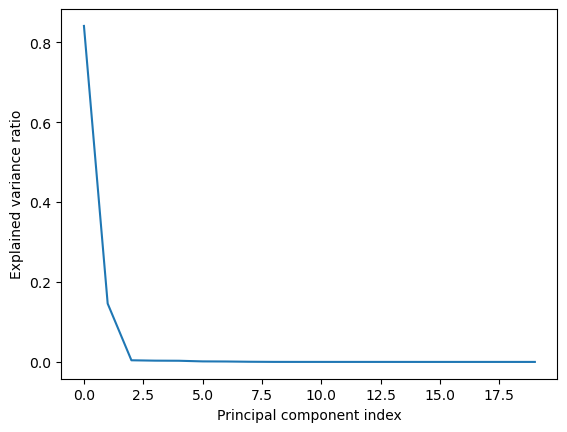

Group: High


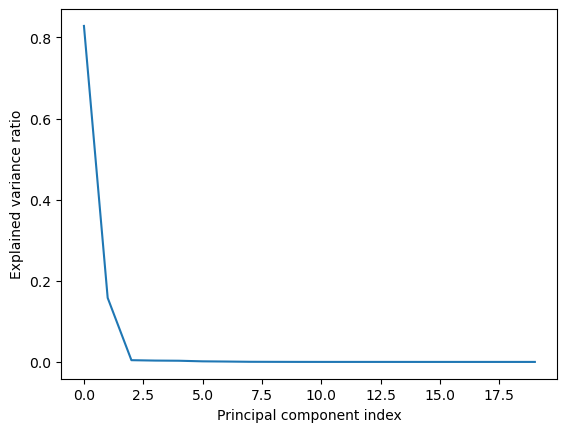

Group: Special 1


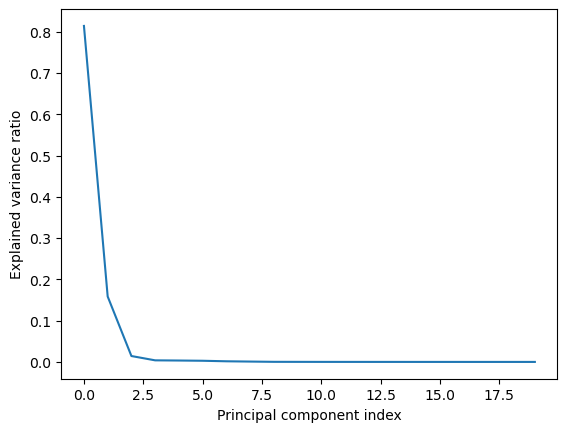

Group: Special 2


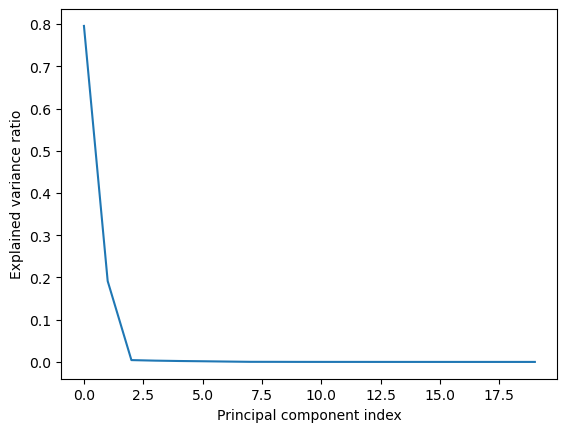

CPU times: total: 2.47 s
Wall time: 885 ms


In [114]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)


# For each location group:
for group in train_and_cv_unfilled['Location_group'].unique():
    print('Group: {}'.format(group))
    # Choose data
    data = X_train_and_cv.loc[train_and_cv_unfilled['Location_group'] == group, :]
    # Fit PCA
    pca.fit(data)
    # Plot the explained variance ratio
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal component index')
    plt.ylabel('Explained variance ratio')
    plt.show()


Interestingly, most of variance is explained just by 2 principal components.

Here is what we will do next:

We'll work with each location separately. For each location

-) We'll transform our features into 2 components.

-) We'll predict 'emission' directly 

-) We'll do double-layerd prediction, as in 12

Then we'll combine our prediction from all locations and calculate scores.

Let's go:

In [115]:
%%time

pca = PCA(n_components=2)

# DataFrames with predictions
pred_train = pd.DataFrame(index=X_train.index, columns=['direct', 'two-layered'])
pred_cv = pd.DataFrame(index=X_cv.index, columns=['direct', 'two-layered'])
pred_test = pd.DataFrame(index=X_test.index, columns=['direct', 'two-layered'])

# For each location:
for location in train_and_cv_unfilled['Location'].unique():
    # print('Location: {}'.format(location))
    # Choose data
    location_X_train_and_cv = X_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_X_train = X_train.loc[train_unfilled['Location'] == location, :]
    location_X_cv = X_cv.loc[cv_unfilled['Location'] == location, :]
    location_X_test = X_test.loc[test_unfilled['Location'] == location, :]
    location_y_train_and_cv = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_y_train = y_train.loc[train_unfilled['Location'] == location, :]
    location_y_cv = y_cv.loc[cv_unfilled['Location'] == location, :]
    location_y_test = y_test.loc[test_unfilled['Location'] == location, :]
    # Fit PCA
    pca.fit(location_X_train_and_cv)

    # Transform train, cv and test feature sets
    location_X_train_and_cv = pca.transform(location_X_train_and_cv)
    location_X_train = pca.transform(location_X_train)
    location_X_cv = pca.transform(location_X_cv)
    location_X_test = pca.transform(location_X_test)

    # Create predictions directly
    model.fit(location_X_train, location_y_train['emission'])
    location_pred_train = model.predict(location_X_train)
    location_pred_cv = model.predict(location_X_cv)
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission'])
    location_pred_test = model.predict(location_X_test)

    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'direct'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'direct'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'direct'] = location_pred_test

    # Create double-layered predictions
    model.fit(location_X_train, location_y_train['emission_1'])
    location_pred_train = model.predict(location_X_train) + location_y_train['pred_1']
    location_pred_cv = model.predict(location_X_cv) + location_y_cv['pred_1']
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission_1'])
    location_pred_test = model.predict(location_X_test) + location_y_test['pred_1']

    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'two-layered'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'two-layered'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'two-layered'] = location_pred_test

#     print(pred_train.info())
#     print(pred_cv.info())
#     print(pred_test.info())


CPU times: total: 9min 23s
Wall time: 1min 3s


Now, we can test both ways.

## 18. PC by location (direct)

In [116]:
%%time

study_number = str(int(study_number) + 1)


scores_df.loc[int(study_number), 'Comment'] = '15 + PC by location'

error_train = mean_squared_error(y_train['emission'], pred_train['direct'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['direct'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['direct'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 688 ms
Wall time: 85.8 ms


In [117]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.189
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


## 19. PC by location (two-layered)

In [118]:
%%time

study_number = str(int(study_number) + 1)


scores_df.loc[int(study_number), 'Comment'] = '16 + PC by location'

error_train = mean_squared_error(y_train['emission'], pred_train['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['two-layered'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 46.9 ms
Wall time: 62.4 ms


In [119]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.189
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


What if we calculate principal components on the whole dataset and then do a separate prediction for every location?

In [120]:
%%time

pca = PCA(n_components=2)

# Fit PCA
pca.fit(X_train_and_cv)
# Transform train, cv and test feature sets
pc_X_train_and_cv = pd.DataFrame(pca.transform(X_train_and_cv), index=X_train_and_cv.index)
pc_X_train = pd.DataFrame(pca.transform(X_train), index=X_train.index)
pc_X_cv = pd.DataFrame(pca.transform(X_cv), index=X_cv.index)
pc_X_test = pd.DataFrame(pca.transform(X_test), index=X_test.index)

# DataFrames with predictions
pred_train = pd.DataFrame(index=X_train.index, columns=['direct', 'two-layered'])
pred_cv = pd.DataFrame(index=X_cv.index, columns=['direct', 'two-layered'])
pred_test = pd.DataFrame(index=X_test.index, columns=['direct', 'two-layered'])

# For each location:
for location in train_and_cv_unfilled['Location'].unique():
#     print('Location: {}'.format(location))
    # Choose data
    location_X_train_and_cv = pc_X_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_X_train = pc_X_train.loc[train_unfilled['Location'] == location, :]
    location_X_cv = pc_X_cv.loc[cv_unfilled['Location'] == location, :]
    location_X_test = pc_X_test.loc[test_unfilled['Location'] == location, :]
    location_y_train_and_cv = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_y_train = y_train.loc[train_unfilled['Location'] == location, :]
    location_y_cv = y_cv.loc[cv_unfilled['Location'] == location, :]
    location_y_test = y_test.loc[test_unfilled['Location'] == location, :]

    # Create predictions directly
    model.fit(location_X_train, location_y_train['emission'])
    location_pred_train = model.predict(location_X_train)
    location_pred_cv = model.predict(location_X_cv)
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission'])
    location_pred_test = model.predict(location_X_test)

    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'direct'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'direct'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'direct'] = location_pred_test

    # Create double-layered predictions 
    model.fit(location_X_train, location_y_train['emission_1'])
    location_pred_train = model.predict(location_X_train) + location_y_train['pred_1']
    location_pred_cv = model.predict(location_X_cv) + location_y_cv['pred_1']
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission_1'])
    location_pred_test = model.predict(location_X_test) + location_y_test['pred_1']

    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'two-layered'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'two-layered'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'two-layered'] = location_pred_test

#     print(pred_train.info())
#     print(pred_cv.info())
#     print(pred_test.info())


CPU times: total: 7min 56s
Wall time: 50.4 s


## 20. PC (direct)

In [121]:
%%time

study_number = str(int(study_number) + 1)


scores_df.loc[int(study_number), 'Comment'] = '16 + PC'

error_train = mean_squared_error(y_train['emission'], pred_train['direct'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['direct'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['direct'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 781 ms
Wall time: 76.3 ms


In [122]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.189
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


## 21. PC (two-layered)

In [123]:
%%time

study_number = str(int(study_number) + 1)


scores_df.loc[int(study_number), 'Comment'] = '16 + PC'

error_train = mean_squared_error(y_train['emission'], pred_train['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['two-layered'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 31.2 ms
Wall time: 50.1 ms


In [124]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802470,45.00252
3,+ WeekCount,14.413518,153.047855,44.98007
4,2 + Location_enc,6.537063,63.510398,34.14359
5,+ week_no_enc,5.526572,63.505365,33.189
6,4 + Location_group_enc,6.246773,62.532685,34.20915
7,+ tuning,17.918085,52.414541,45.61363
8,6 + Location_cluster_2,6.251627,62.488249,NaN
9,+ Filled based on 2,6.225799,48.515175,42.76071


## (TODO) NEXT STEPS


##  XGBoost


## Cycles


Let's look at the emissions graphs (without covid periond) for locations from 4 groups and at graphs of 'emission_1_12':

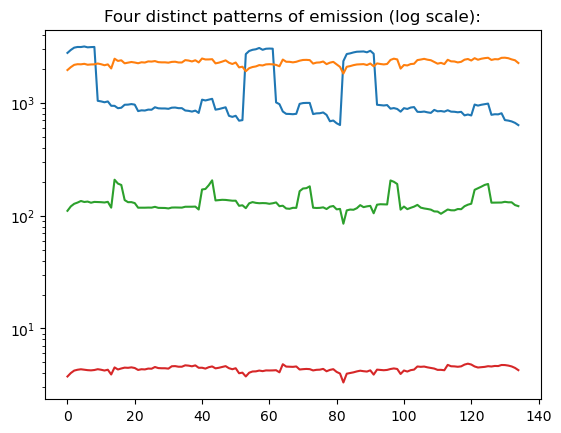

In [125]:

fig, ax = plt.subplots()
for location in four_representatives:
    series = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission']
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns of emission (log scale):')
ax.set_yscale('log')
plt.show()

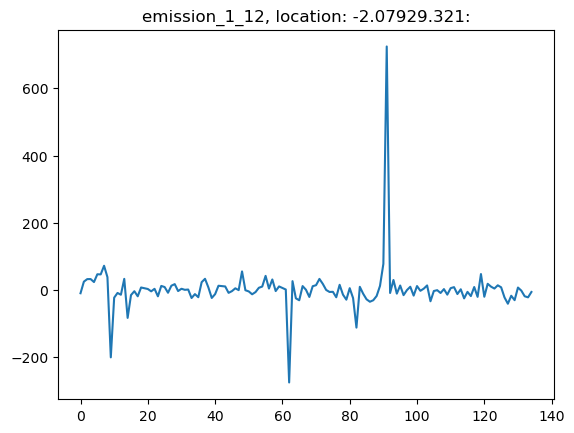

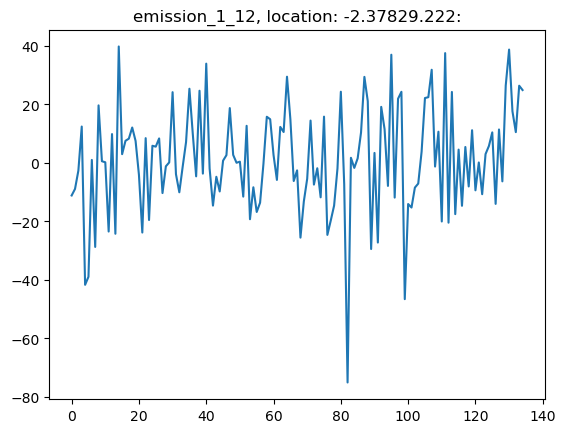

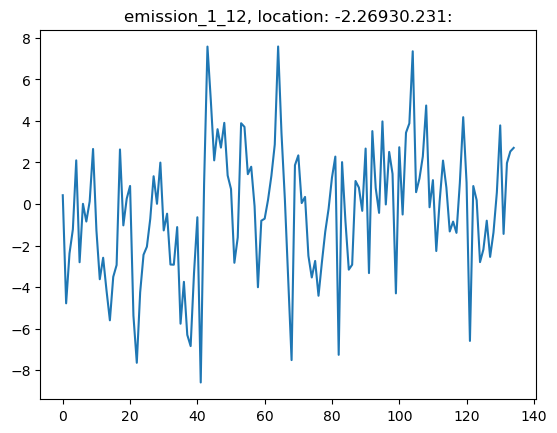

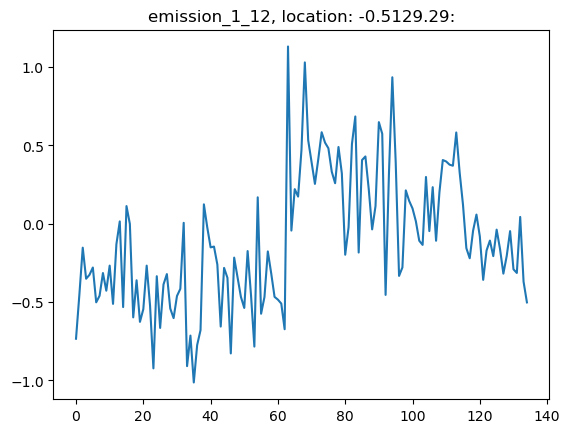

In [126]:
fig, ax = plt.subplots()
for location in four_representatives:
    series = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1']
    plt.plot(range(len(series)), series)   
    plt.title('emission_1_12, location: {}:'.format(location))
    plt.show()



As you can see, our estimator did a good job removing level, trend and seasonality. Let's try to remove cycles.

Let's explore lags of our time series (the four representatives). We'll use a few functions by Ryan Holbrook.

Location group: ['Special 1']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


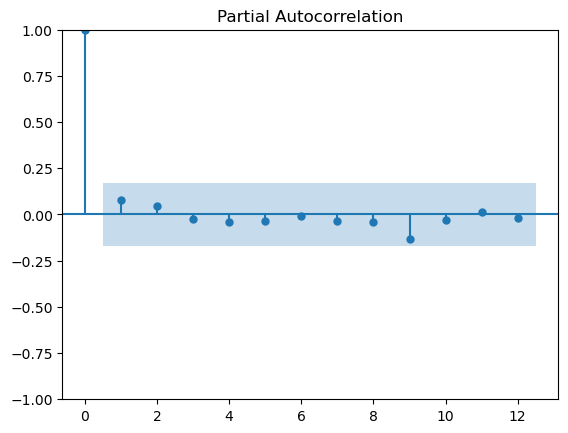

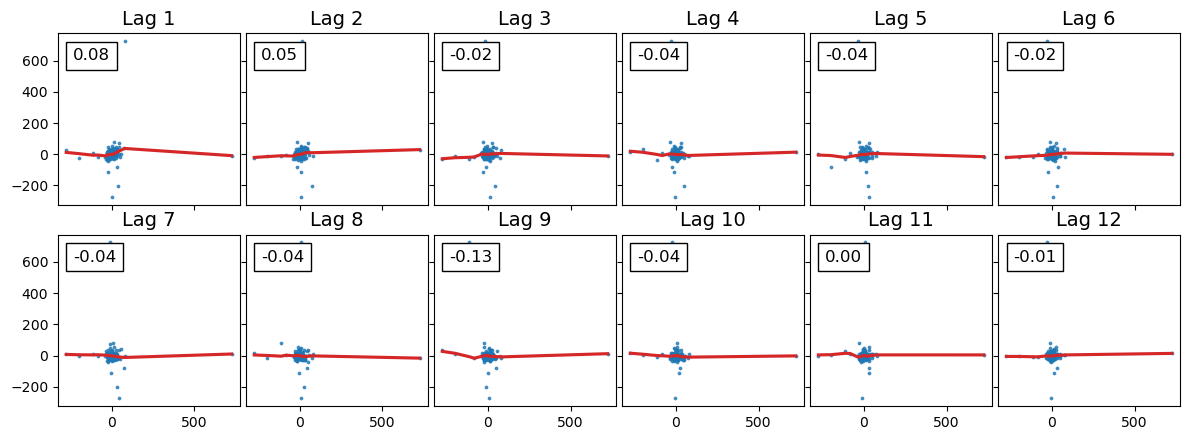

Location group: ['Special 2']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


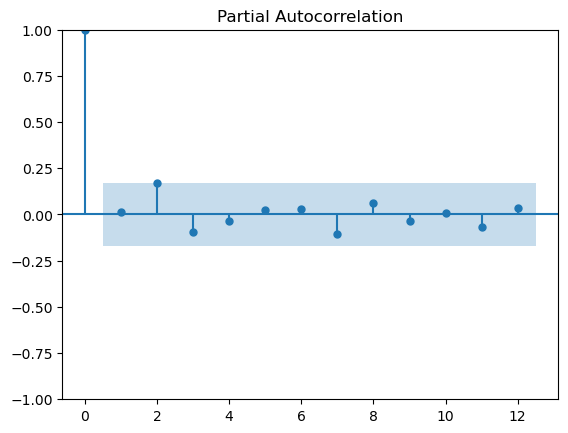

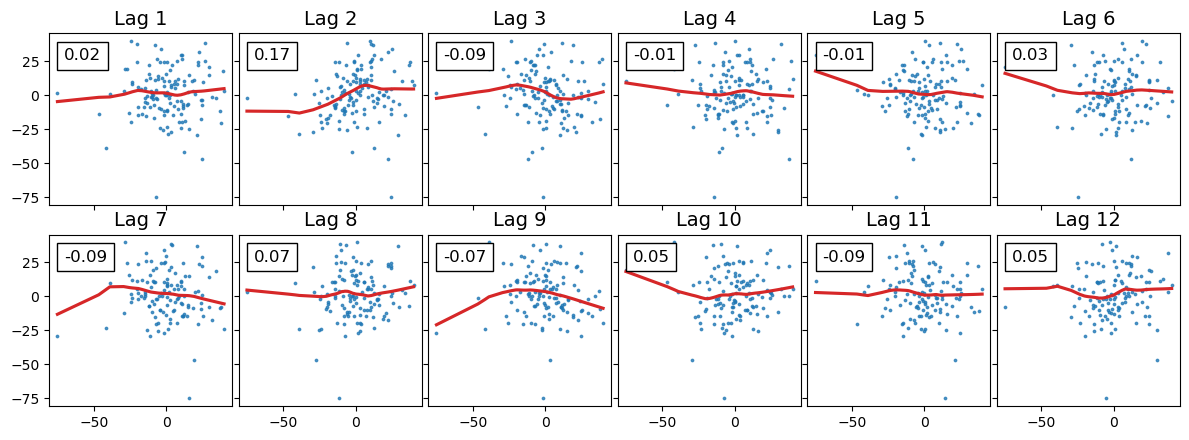

Location group: ['High']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


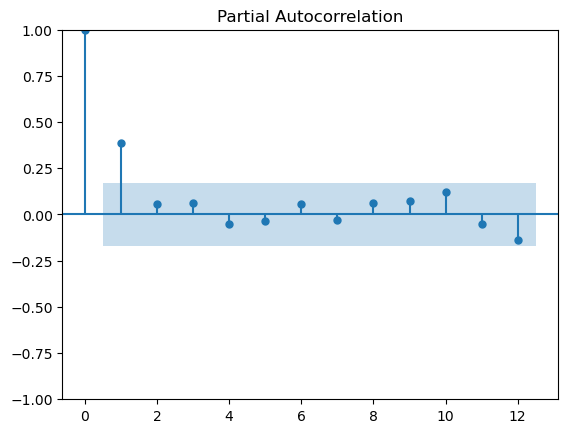

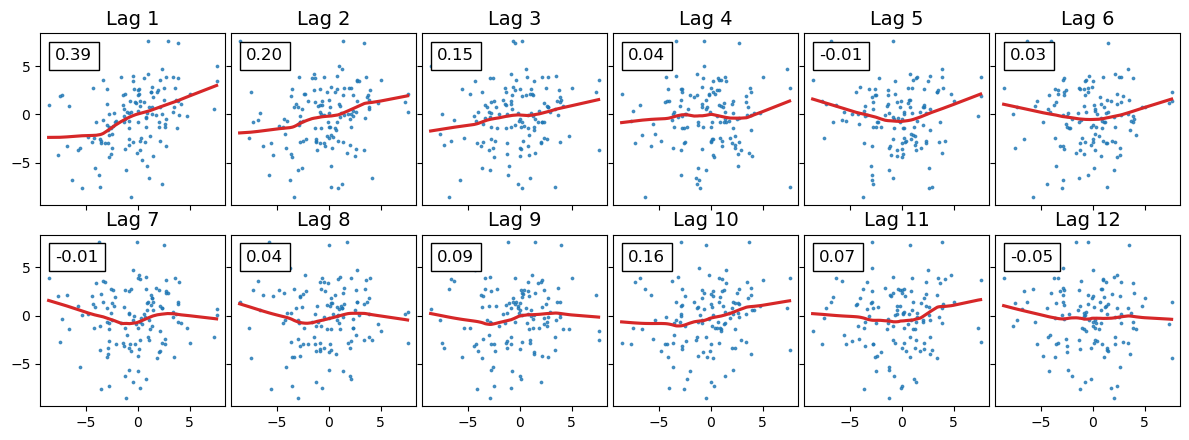

Location group: ['Low']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


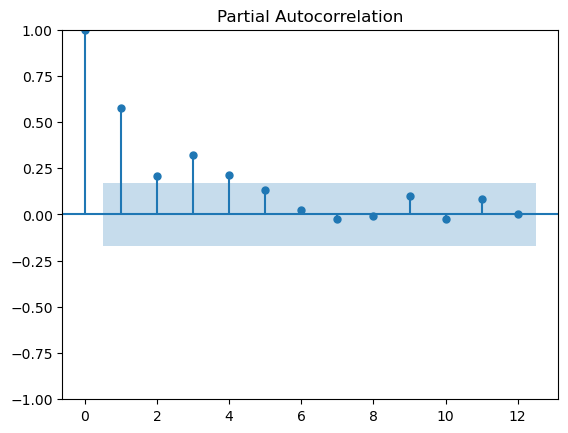

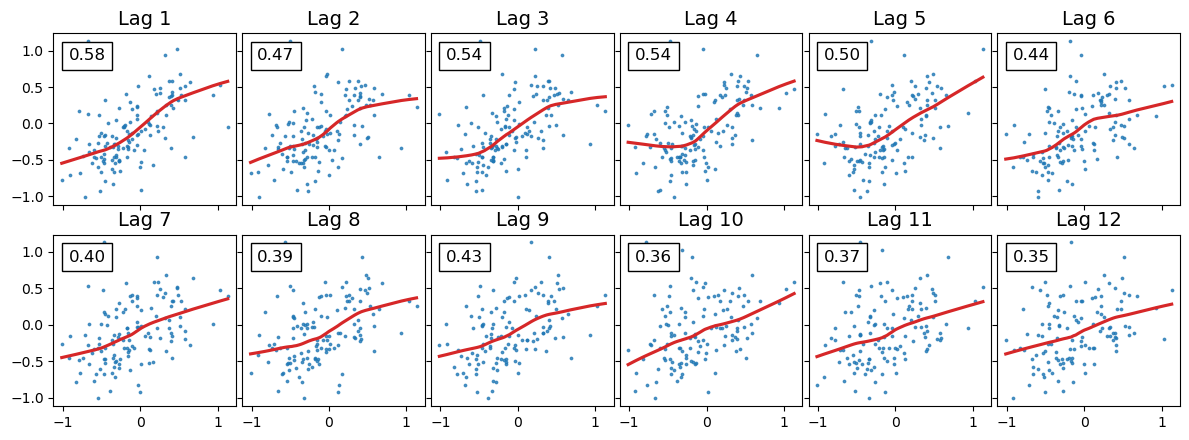

CPU times: total: 5.39 s
Wall time: 9.28 s


In [127]:
%%time

from statsmodels.graphics.tsaplots import plot_pacf

def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

LAGS = 6 * 2

for location in four_representatives:
    print('Location group: {}'.format(train_and_cv_unfilled.loc[train_and_cv_unfilled['Location'] == 
                                                         location, 'Location_group'].unique()))
    series = pd.Series(y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1'].values, \
                   index=train_and_cv_unfilled.loc[train_and_cv_unfilled['Location'] == location, 'date'])
    _ = plot_pacf(series, lags=LAGS)
    _ = plot_lags(series, lags=LAGS, nrows= round(LAGS / 6))
    
    plt.show()




## Saving datasets

In [128]:
train_and_cv_unfilled.to_csv('new_datasets/train_and_cv_unfilled_1_final.csv')
train_unfilled.to_csv('new_datasets/train_unfilled_1_final.csv')
cv_unfilled.to_csv('new_datasets/cv_unfilled_1_final.csv')
test_unfilled.to_csv('new_datasets/test_unfilled_1_final.csv')

y_train_and_cv.to_csv('new_datasets/y_train_and_cv_1_final.csv')
y_train.to_csv('new_datasets/y_train_1_final.csv')
y_cv.to_csv('new_datasets/y_cv_1_final.csv')
y_test.to_csv('new_datasets/y_test_1_final.csv')

X_train_and_cv.to_csv('new_datasets/X_train_and_cv_1_final.csv')
X_train.to_csv('new_datasets/X_train_1_final.csv')
X_cv.to_csv('new_datasets/X_cv_1_final.csv')
X_test.to_csv('new_datasets/X_test_1_final.csv')

pd.DataFrame(four_representatives).to_csv('new_datasets/four_representatives.csv')


In [129]:
%%time

## Save the feature importances for our best model

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1)

## Train the model on the whole training set
model.fit(X_train_and_cv, y_train_and_cv['emission'])

feature_importances = pd.Series(data=model.feature_importances_,
                                index=X_train_and_cv.columns)

print('Sorted feature importances (first 30):')
feature_importances_sorted = feature_importances.sort_values(ascending=False)

feature_importances_sorted.head(30)

Sorted feature importances (first 30):
CPU times: total: 7.34 s
Wall time: 943 ms


Location_week_no_enc                                       363
emission_pred_2_04                                         278
Max_x_groups                                               217
week_no_enc                                                173
week_no                                                    153
year                                                       144
Ozone_O3_column_number_density                             114
Location_enc                                               113
latitude                                                    87
Cloud_solar_zenith_angle                                    62
UvAerosolIndex_solar_zenith_angle                           56
UvAerosolIndex_solar_azimuth_angle                          55
UvAerosolIndex_sensor_azimuth_angle                         52
NitrogenDioxide_stratospheric_NO2_column_number_density     47
Cloud_surface_albedo                                        47
Location_group_enc                                     

In [130]:
feature_importances_sorted.to_csv('new_datasets/feature_importances_sorted_1_final.csv')